In [1]:
%autocall 2

Automatic calling is: Full


In [3]:
import pymeshlab as pml
import os

import numpy as np

from sklearn import manifold

import matplotlib.pyplot as plt
import matplotlib as mpl

import gc

In [17]:
import ipython_memory_usage

In [18]:
%ipython_memory_usage_start

'memory profile enabled'

In [18] used 10.4414 MiB RAM in 9.35s, peaked 0.00 MiB above current, total RAM usage 186.22 MiB


In [4]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [5]:
%matplotlib ipympl

In [6]:
mpl.interactive(False)
plt.interactive(False)

In [7]:
pwd

'C:\\Users\\m142519\\Desktop\\Jupyter Notebooks'

In [12]:
cd "c://Users/m142519/Documents/Artec Studio Projects/CPI nose scans"

c:\Users\m142519\Documents\Artec Studio Projects\CPI nose scans


In [14]:
cd "./UCI-22-057-WC-UN/UCI-22-057-WC-UN-subunits/"

c:\Users\m142519\Documents\Artec Studio Projects\CPI nose scans\UCI-22-057-WC-UN\UCI-22-057-WC-UN-subunits


In [15]:
cd "./IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm"

[WinError 2] The system cannot find the file specified: './IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm'
c:\Users\m142519\Documents\Artec Studio Projects\CPI nose scans\UCI-22-057-WC-UN\UCI-22-057-WC-UN-subunits


In [19]:
gc.collect()

503

In [19] used 0.0195 MiB RAM in 0.17s, peaked 0.00 MiB above current, total RAM usage 186.24 MiB


In [20]:
meshset = pml.MeshSet(verbose = True)

In [20] used 0.0156 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 186.25 MiB


In [21]:
meshset.clear()

In [21] used 0.0039 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 186.26 MiB


In [22]:
meshset.load_new_mesh("IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm.obj")

{}
In [22] used 1026.1641 MiB RAM in 1.94s, peaked 0.00 MiB above current, total RAM usage 1212.42 MiB


In [23]:
mesh = meshset.current_mesh()

In [23] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 1212.42 MiB


In [24]:
mesh.has_vertex_tex_coord()

True

In [24] used 0.0039 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 1212.43 MiB


In [25]:
mesh.has_vertex_color()

False

In [25] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 1212.43 MiB


In [26]:
meshset.compute_scalar_by_aspect_ratio_per_face(metric = 'Area')

faceareas3D = mesh.face_scalar_array()
faceareas3D

{'metric': 3}


array([0.72892308, 0.70381927, 0.73936794, ..., 0.66391531, 0.63246319,
       0.6621119 ])

In [26] used 0.1055 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 1212.53 MiB


In [27]:
meshset.set_selection_none()
meshset.compute_selection_from_mesh_border()

{'allfaces': True, 'allverts': True}
{}
In [27] used 0.0234 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 1212.55 MiB


In [79]:
border3DvertIDs = mesh.vertex_selection_array().nonzero()
border3DvertIDs

(array([ 90,  91,  92,  94,  97,  99, 102, 132, 134, 142, 144, 148, 150,
        152, 198, 199, 201, 203, 205, 207, 209, 212, 214, 216, 231, 397,
        398, 404, 406, 408, 410, 412, 415, 417, 422, 424, 431, 433, 435,
        437, 440, 442, 444, 446, 448, 450, 452, 456, 458, 459, 461, 463,
        466, 468, 470, 472, 474, 547, 549, 551, 553, 555, 557, 580, 582,
        584, 586, 623, 626, 628, 630, 632, 634, 636, 638, 640, 642, 645,
        647, 650, 652, 654, 801, 803, 808, 810, 812, 814, 818, 820, 823,
        825, 827, 829, 832, 834, 836, 838, 840, 842, 844, 846, 848, 866,
        868, 870, 872, 874, 876, 878, 880, 882, 884], dtype=int64),)

In [67]:
borderpoints3D = mesh.vertex_matrix()[border3DvertIDs]
borderpoints3D.shape

(113, 3)

In [20]:
meshset.filter_parameter_values("compute_scalar_by_geodesic_distance_from_given_point_per_vertex")

{'startpoint': array([10.929976,  4.496085, -8.044939]),
 'maxdistance': 59.97921371459961}

In [88]:
bordermutualdistances = []

for v in borderpoints3D:
    meshset.compute_scalar_by_geodesic_distance_from_given_point_per_vertex(startpoint = v,
                                                                            maxdistance = pml.Percentage(100.0))
    bordermutualdistances.append(mesh.vertex_scalar_array())

bordermutualdistances = np.array(bordermutualdistances)
bordermutualdistances = bordermutualdistances[:, border3DvertIDs[0]]

sym_bordermutualdistances = 0.5 * (bordermutualdistances + bordermutualdistances.T)

{'startpoint': array([31.73070908, 12.97861385, 25.28949738]), 'maxdistance': 119.95842742919922}
{'startpoint': array([30.32723045, 13.36981773, 25.61695099]), 'maxdistance': 119.95842742919922}
{'startpoint': array([28.81245995, 13.70762825, 25.79471779]), 'maxdistance': 119.95842742919922}
{'startpoint': array([27.28621674, 13.87953854, 25.75605011]), 'maxdistance': 119.95842742919922}
{'startpoint': array([25.74134827, 13.79522991, 25.66729355]), 'maxdistance': 119.95842742919922}
{'startpoint': array([24.32102394, 13.70910454, 25.35242653]), 'maxdistance': 119.95842742919922}
{'startpoint': array([23.22390938, 13.06125546, 24.55189133]), 'maxdistance': 119.95842742919922}
{'startpoint': array([22.3387413 , 12.22089386, 23.68919373]), 'maxdistance': 119.95842742919922}
{'startpoint': array([21.67407227, 11.55352974, 22.62851334]), 'maxdistance': 119.95842742919922}
{'startpoint': array([21.25239754, 10.90902901, 21.80085373]), 'maxdistance': 119.95842742919922}
{'startpoint': array

In [69]:
for meshid in range(meshset.number_meshes()):
    meshset.set_current_mesh(meshid)
    print(meshset.current_mesh_id(), meshset.filter_parameter_values("set_mesh_name"))

0 {'newname': 'IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm.obj'}


In [88]:
bordermutualdistances = []

for v in borderpoints3D:
    meshset.compute_scalar_by_geodesic_distance_from_given_point_per_vertex(startpoint = v,
                                                                            maxdistance = pml.Percentage(100.0))
    bordermutualdistances.append(mesh.vertex_scalar_array())

bordermutualdistances = np.array(bordermutualdistances)
bordermutualdistances = bordermutualdistances[:, border3DvertIDs[0]]

sym_bordermutualdistances = 0.5 * (bordermutualdistances + bordermutualdistances.T)

{'startpoint': array([31.73070908, 12.97861385, 25.28949738]), 'maxdistance': 119.95842742919922}
{'startpoint': array([30.32723045, 13.36981773, 25.61695099]), 'maxdistance': 119.95842742919922}
{'startpoint': array([28.81245995, 13.70762825, 25.79471779]), 'maxdistance': 119.95842742919922}
{'startpoint': array([27.28621674, 13.87953854, 25.75605011]), 'maxdistance': 119.95842742919922}
{'startpoint': array([25.74134827, 13.79522991, 25.66729355]), 'maxdistance': 119.95842742919922}
{'startpoint': array([24.32102394, 13.70910454, 25.35242653]), 'maxdistance': 119.95842742919922}
{'startpoint': array([23.22390938, 13.06125546, 24.55189133]), 'maxdistance': 119.95842742919922}
{'startpoint': array([22.3387413 , 12.22089386, 23.68919373]), 'maxdistance': 119.95842742919922}
{'startpoint': array([21.67407227, 11.55352974, 22.62851334]), 'maxdistance': 119.95842742919922}
{'startpoint': array([21.25239754, 10.90902901, 21.80085373]), 'maxdistance': 119.95842742919922}
{'startpoint': array

In [89]:
bordermutualdistances.shape

(113, 113)

In [108]:
# metric = 'minkowski'
metric = 'precomputed'

isomap = manifold.Isomap(n_components = 2, 
                         metric = metric,
                         n_neighbors = 20, 
                         p = 1)

In [109]:
if metric == 'minkowski':
    x_isomink = isomap.fit_transform(mesh.vertex_matrix())
elif metric == 'precomputed':
    x_iso = isomap.fit_transform(mutualdistances)
    # x_iso_border = isomap.fit_transform(bordermutualdistances)

In [110]:
isomap.reconstruction_error()

22.47024559967189

In [111]:
isomap.__dict__

{'n_neighbors': 20,
 'radius': None,
 'n_components': 2,
 'eigen_solver': 'auto',
 'tol': 0,
 'max_iter': None,
 'path_method': 'auto',
 'neighbors_algorithm': 'auto',
 'n_jobs': None,
 'metric': 'precomputed',
 'p': 1,
 'metric_params': None,
 'nbrs_': NearestNeighbors(metric='precomputed', n_neighbors=20, p=1, radius=None),
 'n_features_in_': 1139,
 'kernel_pca_': KernelPCA(kernel='precomputed', n_components=2),
 'dist_matrix_': array([[ 0.        ,  1.29813767,  1.27699727, ..., 13.91664458,
         13.53879515, 13.18220513],
        [ 1.29813767,  0.        ,  1.31819509, ..., 14.72402407,
         14.34636188, 14.14486945],
        [ 1.27699727,  1.31819509,  0.        , ..., 13.44821838,
         13.07055619, 12.86906376],
        ...,
        [13.91664458, 14.72402407, 13.44821838, ...,  0.        ,
          1.11523829,  2.26069167],
        [13.53879515, 14.34636188, 13.07055619, ...,  1.11523829,
          0.        ,  1.1455948 ],
        [13.18220513, 14.14486945, 12.86906

In [24]:
md_scaling = manifold.MDS(n_components = 2, n_init = 10, verbose = 1, dissimilarity = 'precomputed')

In [25]:
x_mds = md_scaling.fit_transform(sym_mutualdistances)

breaking at iteration 94 with stress 378843.4588397852
breaking at iteration 92 with stress 378843.11229028244
breaking at iteration 91 with stress 378840.448543346
breaking at iteration 90 with stress 378840.5981549414
breaking at iteration 120 with stress 378843.7450124189
breaking at iteration 88 with stress 378838.3083034053
breaking at iteration 84 with stress 378842.40010712494
breaking at iteration 90 with stress 378832.8035206345
breaking at iteration 79 with stress 378822.03703320835
breaking at iteration 96 with stress 378840.5439435158


In [26]:
# Compute stress
# stress = ((dis.ravel() - disparities.ravel()) ** 2).sum() / 2

np.sqrt(2 * md_scaling.stress_) / len(sym_mutualdistances)

0.7642032692974666

In [311]:
md_scaling.__dict__

{'n_components': 2,
 'dissimilarity': 'precomputed',
 'metric': True,
 'n_init': 10,
 'max_iter': 300,
 'eps': 0.001,
 'verbose': 1,
 'n_jobs': None,
 'random_state': None,
 'n_features_in_': 1139,
 'dissimilarity_matrix_': array([[ 0.        ,  1.29813768,  1.27699723, ..., 13.77552907,
         13.39665254, 13.09426194],
        [ 1.29813768,  0.        ,  1.31819509, ..., 14.58741071,
         14.28805992, 14.06458421],
        [ 1.27699723,  1.31819509,  0.        , ..., 13.28775546,
         13.01072969, 12.82102837],
        ...,
        [13.77552907, 14.58741071, 13.28775546, ...,  0.        ,
          1.11523827,  2.26069162],
        [13.39665254, 14.28805992, 13.01072969, ...,  1.11523827,
          0.        ,  1.14559476],
        [13.09426194, 14.06458421, 12.82102837, ...,  2.26069162,
          1.14559476,  0.        ]]),
 'embedding_': array([[  8.34972138,  -4.35198242],
        [  8.55731093,  -2.93378199],
        [  7.34364097,  -3.61691559],
        ...,
        [

In [27]:
meshset.set_selection_all(allverts = True, allfaces = True)

r = meshset.get_area_and_perimeter_of_selection()

meshset.set_selection_none(allverts = True, allfaces = True)

perimeter = r['perimeter']
surface_area = r['selected_surface_area']

print("perimeter: ", perimeter)
print("surface area: ", surface_area)

{'allfaces': True, 'allverts': True}
{}
{'allfaces': True, 'allverts': True}
perimeter:  169.91773731083248
surface area:  1426.290127401824


In [ ]:
newx, newy = x_mds.T

In [101]:
newx, newy = x_iso_border.T

In [101]:
newx, newy = x_iso_border.T

In [100]:
meshset.filter_parameter_values("compute_coord_by_function")

{'x': 'x', 'y': 'y', 'z': 'sin(x+y)', 'onselected': False}

In [28]:
meshset.set_current_mesh(0)

newx, newy = x_mds.T
xname = "uMDS"
yname = "vMDS"

mesh.add_vertex_custom_scalar_attribute(newx, xname)
mesh.add_vertex_custom_scalar_attribute(newy, yname)

In [102]:
meshset.set_current_mesh(0)

newx, newy = x_iso_border.T # x_iso.T
xname = "uISO"
yname = "vISO"

mesh.add_vertex_custom_scalar_attribute(newx, xname)
mesh.add_vertex_custom_scalar_attribute(newy, yname)

PyMeshLabException: The given vector has different number of elements than the number of vertices of the mesh.

In [138]:
meshset.set_current_mesh(0)

newx, newy = x_isomink.T
xname = "uISOmink"
yname = "vISOmink"

mesh.add_vertex_custom_scalar_attribute(newx, xname)
mesh.add_vertex_custom_scalar_attribute(newy, yname)

In [104]:
for meshnumber in range(meshset.number_meshes()):
    meshset.set_current_mesh(meshnumber)
    
    print(meshset.current_mesh_id(),
          meshset.filter_parameter_values("set_mesh_name"))

0 {'newname': 'IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm.obj'}


In [492]:
meshdict = {1: mBFF0, 2: mOC}

meshnumber = 2

meshset.set_current_mesh(meshnumber)

meshset.compute_texcoord_transfer_wedge_to_vertex()
meshset.compute_coord_by_function(x = 'vtu', y = 'vtv', z = '0.0', onselected = False)

meshdict[meshnumber] = meshset.current_mesh()

mesh = meshdict[meshnumber]

{}
{'x': 'vtu', 'y': 'vtv', 'z': '0.0', 'onselected': False}


In [524]:
meshset.set_current_mesh(0)

xname = "uISO"
yname = "vISO"

newx, newy = x_iso.T

In [527]:
meshset.compute_coord_by_function(x = xname, y = yname, z = '0.0', onselected = False)

mesh = meshset.current_mesh()

{'x': 'uISO', 'y': 'vISO', 'z': '0.0', 'onselected': False}


In [528]:
mesh.vertex_matrix()

array([[-9.80308909,  1.01104811,  0.        ],
       [-9.36558898, -0.45342239,  0.        ],
       [-8.52105295,  0.74676944,  0.        ],
       ...,
       [-0.20698001, 10.99614494,  0.        ],
       [-1.31419154, 11.32073878,  0.        ],
       [-2.46291454, 11.65095482,  0.        ]])

In [529]:
meshset.compute_scalar_by_aspect_ratio_per_face(metric = 'Area')

faceareasUV = mesh.face_scalar_array()
faceareasUV

{'metric': 3}


array([0.88094108, 0.85546287, 0.91731798, ..., 0.60703733, 0.56202845,
       0.60912505])

In [530]:
print((faceareasUV / faceareas3D).min())
print((faceareasUV / faceareas3D).mean())
print((faceareasUV / faceareas3D).max())
print((faceareasUV / faceareas3D).std())

0.10882162405448731
1.0523420919367135
1.5930156492192409
0.2512779134568536


In [531]:
meshset.set_selection_all()

r = meshset.get_area_and_perimeter_of_selection()

meshset.set_selection_none()

flatperimeter = r['perimeter']
flatsurface_area = r['selected_surface_area']

print("flat perimeter: ", flatperimeter)
print("flat surface area: ", flatsurface_area)

{'allfaces': True, 'allverts': True}
{}
{'allfaces': True, 'allverts': True}
flat perimeter:  179.7446127886341
flat surface area:  1493.782946484572


In [532]:
flatperimeter / perimeter

1.0578331352178096

In [533]:
flatsurface_area / surface_area

1.0473205400402616

In [ ]:
meshset.compute_selection_from_mesh_border()

In [ ]:
mesh.vertex_selection_array().nonzero()

In [323]:
mesh = meshset.current_mesh()

In [534]:
flatmutualdistances = []

for v in mesh.vertex_matrix():
    meshset.compute_scalar_by_geodesic_distance_from_given_point_per_vertex(startpoint = v,
                                                                            maxdistance = pml.Percentage(100.0))
    flatmutualdistances.append(mesh.vertex_scalar_array())

flatmutualdistances = np.array(flatmutualdistances)

sym_flatmutualdistances = 0.5 * (flatmutualdistances + flatmutualdistances.T)

{'startpoint': array([-9.80308914,  1.01104808,  0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-9.36558914, -0.4534224 ,  0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-8.52105331,  0.74676943,  0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-10.62788868,  -0.13873689,   0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-10.29350376,  -1.67550516,   0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-11.3725853 ,  -1.34710956,   0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-8.92024612, -1.94513488,  0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-8.12285709, -0.90681368,  0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-7.29229927,  0.15692686,  0.        ]), 'maxdistance': 151.18145751953125}
{'startpoint': array([-7.41861534,  1.33493996,  0.        ]), 'maxdistance': 151.18145751953125}
{'startpoin

In [535]:
print(np.nanmin(flatmutualdistances/mutualdistances), '\n', 
      np.nanmean(flatmutualdistances/mutualdistances), '\n', 
      np.nanmax(flatmutualdistances/mutualdistances), '\n',
     np.nanstd(flatmutualdistances/mutualdistances))

0.13220247580518393 
 1.0301349258089534 
 1.6932121976644257 
 0.0805427067935734


<ipython-input-535-5d0b2d1cb870>:1: RuntimeWarning: invalid value encountered in true_divide
  print(np.nanmin(flatmutualdistances/mutualdistances), '\n',
<ipython-input-535-5d0b2d1cb870>:2: RuntimeWarning: invalid value encountered in true_divide
  np.nanmean(flatmutualdistances/mutualdistances), '\n',
<ipython-input-535-5d0b2d1cb870>:3: RuntimeWarning: invalid value encountered in true_divide
  np.nanmax(flatmutualdistances/mutualdistances), '\n',
<ipython-input-535-5d0b2d1cb870>:4: RuntimeWarning: invalid value encountered in true_divide
  np.nanstd(flatmutualdistances/mutualdistances))


In [536]:
plt.close(f)

f = plt.figure()
a = f.add_subplot()

In [537]:
h, xedges, yedges = np.histogram2d(mutualdistances.flatten(), flatmutualdistances.flatten(), bins = 1000)

In [538]:
hma = np.ma.masked_values(h, 0.0)

In [539]:
hma.fill_value = np.nan

In [540]:
np.percentile(hma.compressed(), [1, 99])

array([ 1.  , 95.83])

In [541]:
a.collections.pop()

IndexError: list index out of range

In [542]:
a.pcolormesh(xedges, yedges, hma.T, 
             # cmap = cmap,
             vmin = np.percentile(hma.compressed(), 1),
             vmax = np.percentile(hma.compressed(), 99), 
             rasterized = True)

In [543]:
a.collections[0].get_clim()

(1.0, 95.83000000000175)

In [544]:
a.set_xlabel('geodesic from 3D shape')
a.set_ylabel('Euclidian from flattened shape')

Text(42.722222222222214, 0.5, 'Euclidian from flattened shape')

In [545]:
a.lines.pop()

IndexError: list index out of range

In [546]:
a.plot([0, np.max([xedges.max(), yedges.max()])], [0, np.max([xedges.max(), yedges.max()])], 'r-', zorder = -1, alpha = 0.5)

In [547]:
a.set_aspect('equal')
a.grid(True)

In [548]:
f.canvas.draw_idle()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
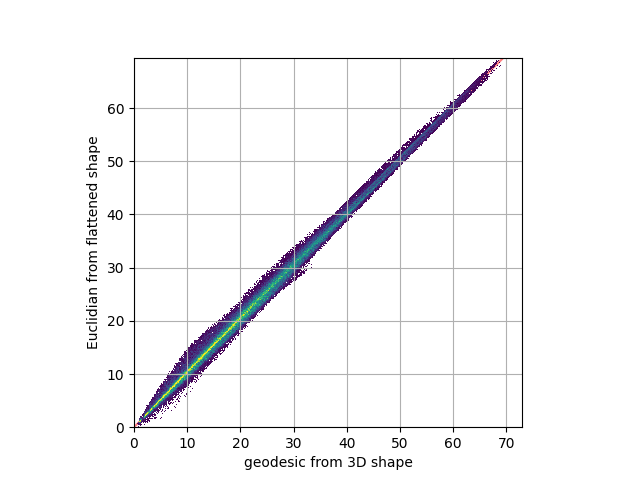

In [549]:
display(f.canvas)

In [105]:
xrange = newx.max() - newx.min()
yrange = newy.max() - newy.min()
print(xrange, yrange)

72.54040723483598 35.94535521215562


In [45]:
from mpl_toolkits.axes_grid1 import Divider, Size

In [107]:
UVtriangulation = mpl.tri.triangulation.Triangulation(newx, newy, triangles = mesh.face_matrix()[border3DvertIDs])

ValueError: triangles max element is out of bounds

In [87]:
from matplotlib.colors import ListedColormap

In [88]:
meshset.compute_color_from_texture_per_vertex()

{}


In [89]:
texturecolor = ListedColormap(mesh.vertex_color_matrix(), name = 'texture')

textureindex = np.arange(texturecolor.N)

In [90]:
plt.close('all')

mm = 1/25.4

scale = 1.0

hpad = 25 # in mm
vpad = 25 # in mm

fig = plt.figure(figsize = (scale * (xrange + hpad) * mm, scale * (yrange + vpad) * mm))

In [91]:
ax = fig.add_subplot()

In [ ]:
# The first items are for padding and the second items are for the axes.
# sizes are in inch.
h = [Size.Fixed(hpad*mm), Size.Fixed(scale * xrange * mm)]
v = [Size.Fixed(vpad*mm), Size.Fixed(scale * yrange * mm)]

# The width and height of the rectangle are ignored.
divider = Divider(fig, (0, 0, 1, 1), h, v, aspect = False)

ax = fig.add_axes(divider.get_position(), axes_locator = divider.new_locator(nx = 1, ny = 1))

In [55]:
ax.collections.pop()

In [ ]:
ax.tripcolor(UVtriangulation, facecolors = faceareasUV / faceareas3D - 1.0, shading = 'flat')

In [ ]:
ax.tripcolor(UVtriangulation, np.nanmax(flatmutualdistances/mutualdistances, axis = 1), shading = 'gouraud')

In [52]:
ax.tripcolor(UVtriangulation, textureindex, shading = 'gouraud', cmap = texturecolor)

In [ ]:
cbar = fig.colorbar(ax.collections[0], location = 'bottom', label = 'area ratio', pad = 0.9, shrink = 0.75)

In [153]:
xname, yname

('uISOmink', 'vISOmink')

In [238]:
meshset.load_new_mesh('output/IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm_input_0.999_1_OptCuts_bd4.1/finalResult_mesh.obj')

In [423]:
for meshnumber in range(meshset.number_meshes()):
    meshset.set_current_mesh(meshnumber)
    
    print(meshset.current_mesh_id(),
          meshset.filter_parameter_values("set_mesh_name"))

0 {'newname': 'IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm.obj'}
1 {'newname': 'BFF00conesIsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm.obj'}
2 {'newname': 'finalResult_mesh.obj'}


In [238]:
meshset.load_new_mesh('output/IsotropicRemesh1.2TrimmedIsotropicRemesh0.15mm_input_0.999_1_OptCuts_bd4.1/finalResult_mesh.obj')

In [431]:
meshset.set_current_mesh(1)
print(meshset.current_mesh_id())
mBFF0 = meshset.current_mesh()

1


In [432]:
meshset.set_current_mesh(2)
print(meshset.current_mesh_id())
mOC = meshset.current_mesh()

2


In [241]:
meshset.compute_texcoord_transfer_wedge_to_vertex()
print(mOC.vertex_tex_coord_matrix())
meshset.compute_coord_by_function(x = 'vtu', y = 'vtv', z = '0.0', onselected = False)
print(mOC.vertex_matrix())

{}
[[ 0.316708    0.47005701]
 [ 1.428514   -0.1345049 ]
 [ 1.29648101  1.13383496]
 ...
 [-1.12414801 13.81324005]
 [-2.14837098 13.34346962]
 [-3.19665194 12.84183979]]
{'x': 'vtu', 'y': 'vtv', 'z': '0.0', 'onselected': False}
[[ 0.316708    0.47005701  0.        ]
 [ 1.428514   -0.1345049   0.        ]
 [ 1.29648101  1.13383496  0.        ]
 ...
 [-1.12414801 13.81324005  0.        ]
 [-2.14837098 13.34346962  0.        ]
 [-3.19665194 12.84183979  0.        ]]


In [242]:
mesh = mOC

In [243]:
meshset.compute_matrix_by_principal_axis()

{'pointsflag': True, 'freeze': True, 'alllayers': False}


In [244]:
meshset.compute_selection_from_mesh_border()

borderUVvertIDs = mesh.vertex_selection_array().nonzero()

{}


In [245]:
mesh.vertex_matrix()

array([[ 0.        ,  0.10326833, -0.55730888],
       [ 0.        , -1.11366231, -0.90470992],
       [ 0.        , -0.1309459 , -1.71735198],
       ...,
       [ 0.        , 10.47863403, -9.07014511],
       [ 0.        , 10.88047481, -8.0174149 ],
       [ 0.        , 11.27716621, -6.92509565]])

In [225]:
l = ax.lines.pop()

In [231]:
m0 = l.get_data()[0].mean()
m1 = l.get_data()[1].mean()

In [246]:
ax.plot(mesh.vertex_matrix()[borderUVvertIDs][:, 2], mesh.vertex_matrix()[borderUVvertIDs][:, 1], 'y.-', label = 'OptCuts')

In [291]:
ax.legend()

In [248]:
ax.grid(True)

In [249]:
ax.set_aspect('equal')

In [292]:
fig.canvas.draw_idle()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
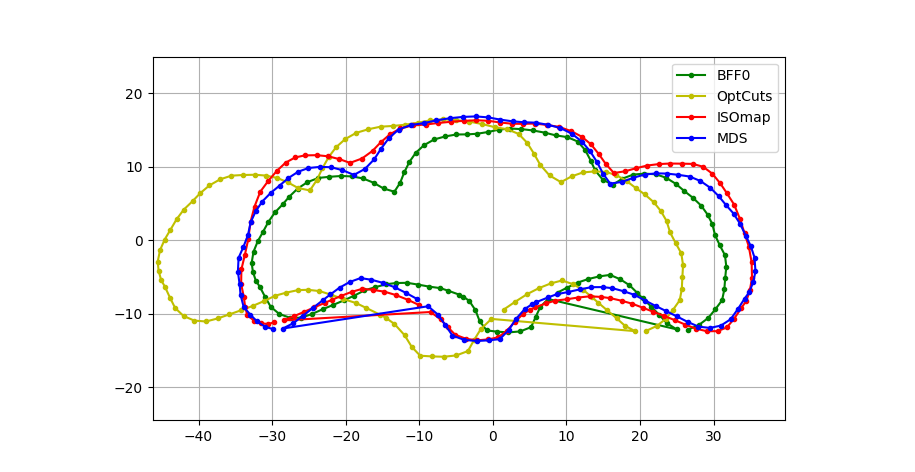

In [293]:
display(fig.canvas)

In [309]:
fig.savefig('compare_flattening.pdf', format = 'pdf', bbox_inches = 'tight', orientation = 'landscape')

In [304]:
from sklearn.decomposition import PCA

In [308]:
pca = PCA(n_components = 2)

ll = ax.lines.pop(index = 0)
print(ll.get_label(), ll.get_color())

newdata = pca.fit_transform(np.array(ll.get_data()).T)

ax.plot(newdata[:, 0], newdata[:, 1], ll.get_color() + '.-', label = ll.get_label())

ax.legend()

In [119]:
mesh.vertex_tex_coord_matrix()

array([[0.316708  , 0.47005701],
       [0.33360001, 0.46243101],
       [0.33116201, 0.48095101],
       ...,
       [0.28917101, 0.67035401],
       [0.27323201, 0.662974  ],
       [0.256749  , 0.65512103]])

In [121]:
# after texture transfer to vertices, the border includes the cone cuts (aka seam cuts)
meshset.compute_selection_from_mesh_border()

borderUVvertIDs = mesh.vertex_selection_array().nonzero()

In [122]:
borderUVvertIDs

(array([ 90,  91,  92,  94,  97,  99, 102, 132, 134, 142, 144, 148, 150,
        152, 198, 199, 201, 203, 205, 207, 209, 212, 214, 216, 231, 397,
        398, 404, 406, 408, 410, 412, 415, 417, 422, 424, 431, 433, 435,
        437, 440, 442, 444, 446, 448, 450, 452, 456, 458, 459, 461, 463,
        466, 468, 470, 472, 474, 547, 549, 551, 553, 555, 557, 580, 582,
        584, 586, 623, 626, 628, 630, 632, 634, 636, 638, 640, 642, 645,
        647, 650, 652, 654, 801, 803, 808, 810, 812, 814, 818, 820, 823,
        825, 827, 829, 832, 834, 836, 838, 840, 842, 844, 846, 848, 866,
        868, 870, 872, 874, 876, 878, 880, 882, 884], dtype=int64),)

In [58]:
borderpointsUV = mesh.vertex_tex_coord_matrix()[border3DvertIDs]
borderpointsUV.shape

NameError: name 'border3DvertIDs' is not defined

In [ ]:
seampoints3D = mesh.vertex_matrix()[borderUVvertIDs]
seampoints3D.shape

In [ ]:
# duplicates so that split border can be introduced to the vertex list
duplicatevertsmask = [(seampoints3D == v).nonzero()[0].shape[0] == 6 for v in seampoints3D]

In [ ]:
[np.unique(np.argwhere(seampoints3D == v)[:, 0]) for v in seampoints3D if (v == seampoints3D).sum() > 3]

In [ ]:
seampoints3D[[0, 122]]

In [ ]:
borderUVvertIDs[0][duplicatevertsmask]

In [ ]:
duplicateverts = seampoints3D[duplicatevertsmask]

In [ ]:
seampoints3D = mesh.vertex_matrix()[borderUVvertIDs]
[(seampoints3D == v).nonzero()[0] for v in seampoints3D]
[(v == borderpoints3D).any() for v in duplicateverts]

In [ ]:
jumpIDs = (np.diff([np.nonzero(borderUVvertIDs[0] == ID)[0][0] for ID in border3DvertIDs[0]]) > 1).nonzero()[0]
jumpIDs

In [ ]:
border3DvertIDs[0].shape

In [ ]:
vertdists = np.sqrt(np.sum(np.diff(borderpoints3D, axis = 0)**2, axis = 1))
vertdists.shape

In [ ]:
jumpIDs = ((np.sqrt(np.sum(np.diff(borderpoints3D, axis = 0)**2, axis = 1))) > 2).nonzero()[0] + 1
jumpIDs

In [ ]:
borderUVvertIDs

In [ ]:
# after transferring texture coordinates to vertices, the border is identical to the texture seam

# meshset.compute_selection_by_texture_seams_per_vertex()

In [ ]:
plt.close('all')

In [ ]:
import gc

In [ ]:
gc.collect()

In [ ]:
fig3d = plt.figure()
ax3d = fig3d.add_subplot(projection='3d')

In [ ]:
ax3d.set_proj_type('ortho')

In [ ]:
xs, ys, zs = borderpoints3D.T
xu, yu, zu = seampoints3D.T

In [ ]:
ax3d.plot3D(xs, ys, zs, 'ro-')

In [ ]:
xj, yj, zj = mesh.vertex_matrix()[border3DvertIDs[0][jumpIDs]].T
xjm1, yjm1, zjm1 = mesh.vertex_matrix()[border3DvertIDs[0][jumpIDs-1]].T

In [ ]:
ax3d.plot3D(xj, yj,zj, 'gx')
ax3d.plot3D(xjm1, yjm1, zjm1, 'b+')

In [ ]:
ax3d.plot3D(xs[0], ys[0], zs[0], 'c*', ms = 10)
ax3d.plot3D(xs[-1], ys[-1], zs[-1], 'm+', ms = 20)

In [ ]:
ax3d.plot(xs, 'r.-', ys, 'g.-', zs, 'b.-')

In [ ]:
ax3d.plot3D(xu, yu, zu, 'g.', zorder = 10)

In [ ]:
xd, yd, zd = duplicateverts.T

In [ ]:
ax3d.plot3D(xd, yd, zd, 'bo', zorder = 20)

In [ ]:
display(fig3d.canvas)

In [ ]:
np.sort(np.sqrt((np.diff(mesh.vertex_matrix()[border3DvertIDs], axis = 0)**2).sum(axis = 1)))

In [ ]:
meshset.transform_align_to_principal_axis()

In [ ]:
fig.clear()
ax.clear()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

In [ ]:
seampointsUV = mesh.vertex_tex_coord_matrix()[borderUVvertIDs]
seampointsUV.shape

In [ ]:
mesh.vertex_matrix()

In [ ]:
xvert, yvert = mesh.vertex_tex_coord_matrix()[border3DvertIDs].T

xvertu, yvertu = mesh.vertex_tex_coord_matrix()[borderUVvertIDs].T

In [ ]:
xvertd, yvertd = mesh.vertex_tex_coord_matrix()[borderUVvertIDs[0][duplicatevertsmask]].T

In [ ]:
[(ind, np.argwhere(border3DvertIDs[0] == vertID)) for ind, vertID in enumerate(borderUVvertIDs[0][duplicatevertsmask]) if (vertID == border3DvertIDs).any()]

In [ ]:
mesh.vertex_tex_coord_matrix()[borderUVvertIDs[0][duplicatevertsmask][7:]]

In [ ]:
border3DvertIDs[0]

In [ ]:
ax.plot(xvert, yvert, 'ro-')

In [ ]:
xvertu, yvertu = mesh.vertex_tex_coord_matrix()[sortedvertsIDs].T

In [ ]:
ax.plot(xvertu, yvertu, 'g.-', zorder = 10)

In [ ]:
ax.plot(xvertd, yvertd, 'bo-', zorder = 5)

In [ ]:
fig.canvas.draw_idle()

In [ ]:
display(fig.canvas)

In [ ]:
np.sort(np.sqrt((np.diff(mesh.vertex_tex_coord_matrix()[vertselectid], axis = 0)**2).sum(axis = 1))).sum() - 17.24

In [ ]:
# MeshLab filter name: ‘Colorize by border distance’
# Store in the quality field the geodesic distance from borders and color the mesh accordingly.

meshset.compute_scalar_by_border_distance_per_vertex()

In [ ]:
meshset.filter_parameter_values('compute_scalar_by_geodesic_distance_from_selection_per_vertex')

In [ ]:
# MeshLab filter name: ‘Colorize by geodesic distance from the selected points’
# Store in the quality field the geodesic distance from the selected points on the mesh surface and color the mesh accordingly.

# meshset.apply_filter('compute_scalar_by_geodesic_distance_from_selection_per_vertex', maxdistance = pml.Percentage(100.0))
meshset.compute_scalar_by_geodesic_distance_from_selection_per_vertex(maxdistance = pml.Percentage(100.0))

In [ ]:
# Distance is stored in vertex quality of the sampled mesh

# meshset.get_hausdorff_distance(sampledmesh = 0, targetmesh = 0)

In [ ]:
xuv, yuv = mesh.vertex_tex_coord_matrix().T

In [ ]:
UVtriangulation = mpl.tri.triangulation.Triangulation(xuv, yuv)

In [ ]:
ax.triplot(UVtriangulation)

In [ ]:
UVtriangulation.triangles.shape

In [ ]:
pml.Mesh()

In [ ]:
import shapely

In [ ]:
from shapely.geometry import Polygon, LinearRing, Point, MultiLineString, LineString

from shapely.strtree import STRtree

In [ ]:
p3d = LinearRing(mesh.vertex_matrix()[border3DvertIDs])

In [ ]:
pUV = LinearRing(mesh.vertex_tex_coord_matrix()[borderUVvertIDs])

In [ ]:
pUV.intersects(pUV)

In [ ]:
points = [Point(l) for l in list(pUV.coords)]
len(points)

In [ ]:
MultiLineString(points)

In [ ]:
tree = STRtree(points)

In [ ]:
index_by_id = dict((id(pt), i) for i, pt in enumerate(points))

In [ ]:
for p in points:
    print([(index_by_id[id(o)], o.wkt) for o in tree.query(p.buffer(1.0)) if o.intersects(p.buffer(1.0))])

In [ ]:
meshset.compute_texcoord_transfer_wedge_to_vertex()

meshset.compute_coord_by_function(x = 'vtu', y = 'vtv', z = '0', onselected = False)

meshset.compute_selection_from_mesh_border()

bordervertsIDs = mesh.vertex_selection_array().nonzero()
borderfaces = mesh.face_matrix()[mesh.face_selection_array()]

setborderfaces = np.array([set(f) for f in borderfaces])

In [ ]:
sortmap = {indset: {ind: (r & set(bordervertsIDs[0])).pop() for ind, r in enumerate(setf & setborderfaces) 
                         if r and len(r) < 3 and (r & set(bordervertsIDs[0]))}
           for indset, setf in enumerate(setborderfaces)}

In [ ]:
sortmap

In [ ]:
len(sortmap)

In [ ]:
_, sortedvertsIDs = [item for item in sortmap[0].items()][1]

sortedvertsIDs = [sortedvertsIDs]

In [ ]:
nextind = 0
countind = 0

while True:
    pairs = [item for item in sortmap[nextind].items() if item[1] not in sortedvertsIDs]
    print(pairs)
    
    if pairs:
        nextind, nextvertsid = [p for p in pairs if p[1] not in sortedvertsIDs][0]
    else:
        break
    
    countind += 1
    
    print(countind, nextind, nextvertsid)

    sortedvertsIDs.append(nextvertsid)
    
    if countind == len(sortmap):
        break

In [ ]:
len(sortedvertsIDs)

In [ ]:
len(sortmap)

In [ ]:
borderfaces.shape

In [ ]:
bordervertsIDs[0].shape